# **Stroke Prediction: EDA and Classification Model Comparison**

Import libraries and load datasets

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load data
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Dictionary
- Gender: gender of the patient [Male, Female, Other]
- Age: age of the patient [Numeric value measured in years]
- Hypertension: abnormally high blood pressure status [0: Normal, 1: High blood pressure]
- Heart Disease: heart disease status [0: Normal, 1: Heart disease]
- Ever Married: marital status [No, Yes]
- Work Type: job of the paatient [Private, Self-employed, Govt_job, children]  
- Residence Type: where patient lives [Rural, Urban]
- Avg Glucose Level: average blood sugar level of patient [Numeric value measured in mg/dL] 
- BMI: body mass index of patient [Numeric value measured in kg/m^2]
- Smoking status: smoking satus of patient [never smoked, smokes, formerly smoked, Unknown]
- Stroke: output class [0: no stroke, 1: stroke]

# Exploratory Data Analysis

In [ ]:
# data shape
df.shape

(5110, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# show unique values
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [ ]:
# data basic statistics
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Understanding the Data: Continuous vs. Categorical

In [ ]:
cat_var = ['gender','hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
cont_var = ["Age","avg_glucose_level","bmi"]
target_var = ["stroke"]
print("The categorial variables are : ", cat_var)
print("The continuous cols are : ", cont_var)
print("The target variable is :  ", target_var)

The categorial variables are :  ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
The continuous cols are :  ['Age', 'avg_glucose_level', 'bmi']
The target variable is :   ['stroke']


Checking Data for Missing Values

In [ ]:
#checking for null values.
df.isnull().sum()
#bmi column has some null values.

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Taking care of null values

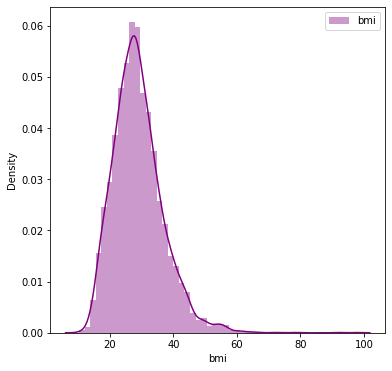

In [ ]:
# Plot distribution of BMI 
fig = plt.figure(figsize=(6,6))
sns.distplot(df.bmi,color='purple',label='bmi',kde=True)
plt.legend()
plt.show()

In [ ]:
# Impute missing values using median
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [ ]:
# Double check there are no null values
df['bmi'].isnull().sum()

0

In [ ]:
# Check for duplicated values
df.duplicated().sum()

0

Premilimiary Data Observations:
- There are total of 12 columns and 5110 rows in the data set.
- The only feature with missing values is BMI, with a total of 201 null values in the data set
- stroke is the target variable of the data set
- The cateogrical data is gender , hypertension , heart_disease , ever_married , work_type , Residence_type , and smoking_status 
- Only one entry has gender listed as type "Other"

# Data Visualization

Understanding Categorical (Discrete) Data

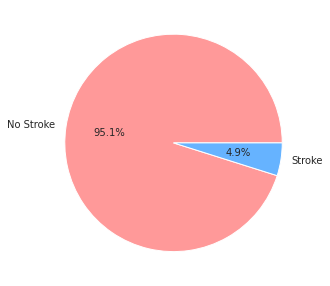

In [ ]:
# Pie chart of normal vs. stroke patients
sns.set_style(style='darkgrid')
plt.figure(figsize=(10,5))
plt.pie(df['stroke'].value_counts(), labels=['No Stroke', 'Stroke'], autopct='%1.1f%%', colors = ['#ff9999','#66b3ff'])
plt.show()

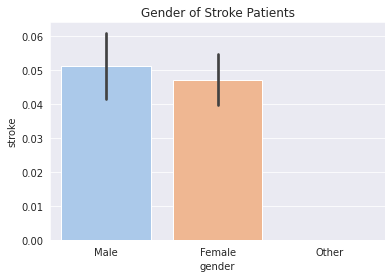

In [ ]:
# Bar plot of gender of stroke patients
plt.figure(figsize=(6,4))
sns.barplot(x='gender', y=df['stroke'], data=df, palette='pastel')
plt.title("Gender of Stroke Patients")
plt.show()

In [ ]:
# count target variable
df['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

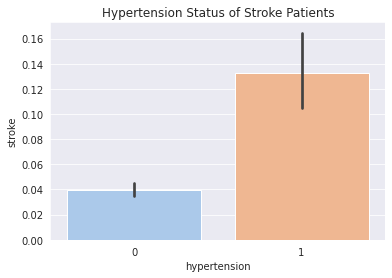

In [ ]:
# Bar plot of hypertension status of stroke patients
plt.figure(figsize=(6,4))
sns.barplot(x='hypertension', y=df['stroke'], data=df, palette='pastel')
plt.title("Hypertension Status of Stroke Patients")
plt.show()

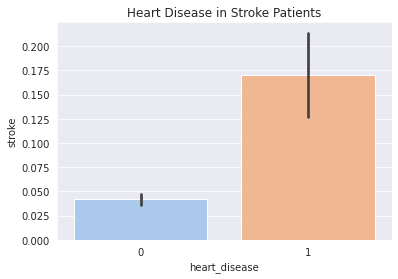

In [ ]:
# Bar plot of heart disease status of stroke patients
plt.figure(figsize=(6,4))
sns.barplot(x='heart_disease', y=df['stroke'], data=df, palette='pastel')
plt.title("Heart Disease in Stroke Patients")
plt.show()

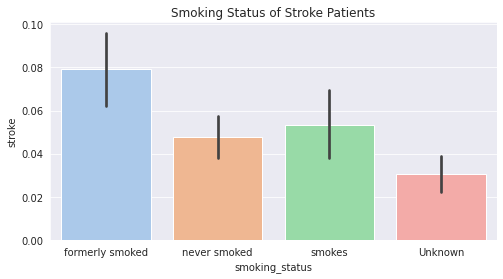

In [ ]:
# Bar plot of smoking status of stroke patients
plt.figure(figsize=(8,4))
sns.barplot(x='smoking_status', y=df['stroke'], data=df, palette='pastel')
plt.title("Smoking Status of Stroke Patients")
plt.show()

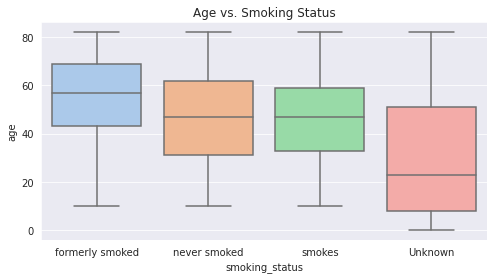

In [ ]:
# Let's breakdown smoking by age
# Bar plot of smoking status of stroke patients
plt.figure(figsize=(8,4))
sns.boxplot(x='smoking_status', y=df['age'], data=df, palette='pastel')
plt.title("Age vs. Smoking Status")
plt.show()

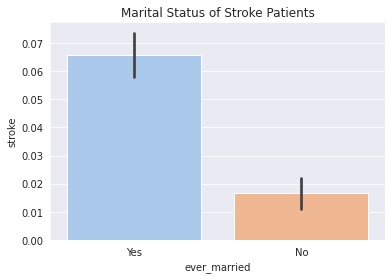

In [ ]:
# Bar plot of marital status of stroke patients
plt.figure(figsize=(6,4))
sns.barplot(x='ever_married', y=df['stroke'], data=df, palette='pastel')
plt.title("Marital Status of Stroke Patients")
plt.show()

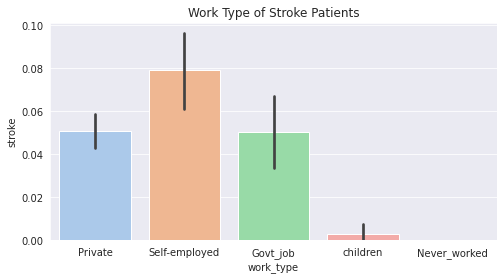

In [ ]:
# Bar plot of work status of stroke patients
plt.figure(figsize=(8,4))
sns.barplot(x='work_type', y=df['stroke'], data=df, palette='pastel')
plt.title("Work Type of Stroke Patients")
plt.show()

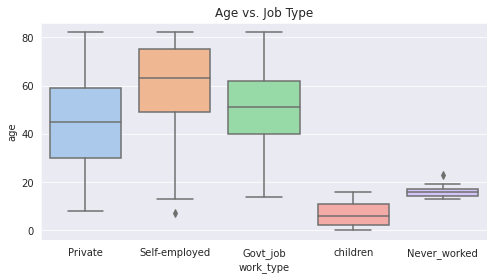

In [ ]:
# Let's breakdown work by age
plt.figure(figsize=(8,4))
sns.boxplot(x='work_type', y=df['age'], data=df, palette='pastel')
plt.title("Age vs. Job Type")
plt.show()

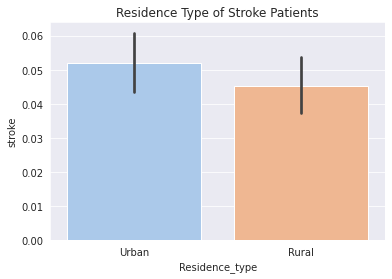

In [ ]:
# Bar plot of residence type of stroke patients
plt.figure(figsize=(6,4))
sns.barplot(x='Residence_type', y=df['stroke'], data=df, palette='pastel')
plt.title("Residence Type of Stroke Patients")
plt.show()

Understanding Numerical (Continuous) Data

In [ ]:
# Find max age 
print(df['age'].max())

82.0


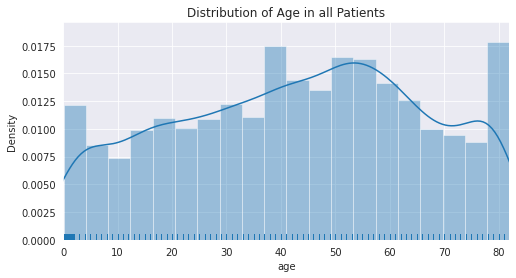

In [ ]:
plt.figure(figsize=(8,4))
sns.color_palette('pastel')
sns.distplot(df.age,kde=True,rug=True)
plt.title("Distribution of Age in all Patients")
plt.xlim([0,82])
plt.show()

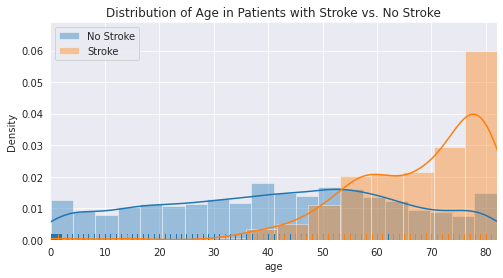

In [ ]:
# Ploting age distribution of stroke vs. no stroke
plt.figure(figsize=(8,4))
sns.color_palette('pastel')
sns.distplot(df[df['stroke']==0].age,kde=True,rug=True,label='No Stroke')
sns.distplot(df[df['stroke']==1].age,kde=True,rug=True,label='Stroke')
plt.title("Distribution of Age in Patients with Stroke vs. No Stroke")
plt.xlim([0,82])
plt.legend()
plt.show()

In [ ]:
# Find max and min avg. glucose 
print(df['avg_glucose_level'].max())
print(df['avg_glucose_level'].min())

271.74
55.12


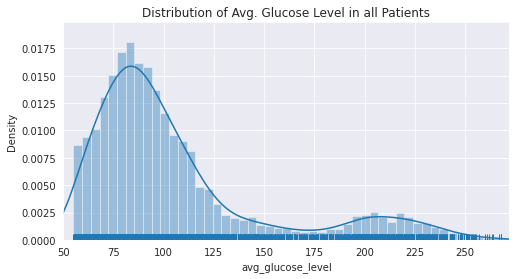

In [ ]:
plt.figure(figsize=(8,4))
sns.color_palette('pastel')
sns.distplot(df.avg_glucose_level,kde=True,rug=True)
plt.title("Distribution of Avg. Glucose Level in all Patients")
plt.xlim([50,272])
plt.show()

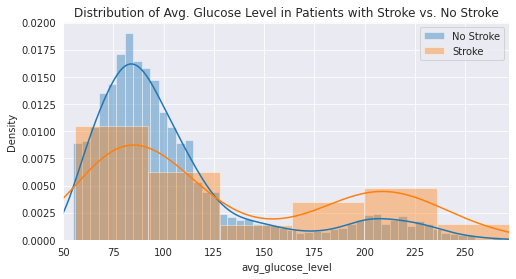

In [ ]:
# Ploting avg. glucose distribution of stroke vs. no stroke
plt.figure(figsize=(8,4))
sns.color_palette('pastel')
sns.distplot(df[df['stroke']==0].avg_glucose_level,kde=True,label='No Stroke')
sns.distplot(df[df['stroke']==1].avg_glucose_level,kde=True,label='Stroke')
plt.title("Distribution of Avg. Glucose Level in Patients with Stroke vs. No Stroke")
plt.xlim([50,272])
plt.legend()
plt.show()

In [ ]:
# Find max and min bmi 
print(df['bmi'].max())
print(df['bmi'].min())

97.6
10.3


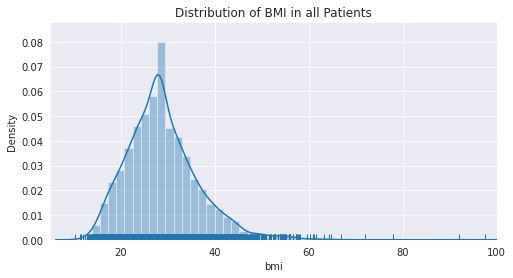

In [ ]:
plt.figure(figsize=(8,4))
sns.color_palette('pastel')
sns.distplot(df.bmi,kde=True,rug=True)
plt.title("Distribution of BMI in all Patients")
plt.xlim([5,100])
plt.show()

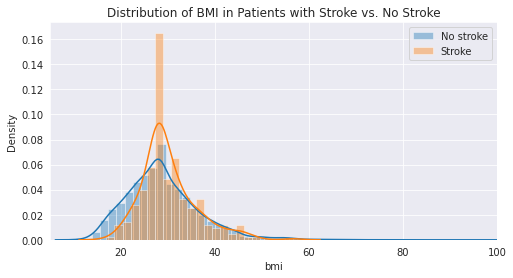

In [ ]:
plt.figure(figsize=(8,4))
sns.color_palette('pastel')
sns.distplot(df[df['stroke']==0].bmi, kde=True, label='No stroke')
sns.distplot(df[df['stroke']==1].bmi, kde=True, label='Stroke')
plt.title("Distribution of BMI in Patients with Stroke vs. No Stroke")
plt.xlim([5, 100])
plt.legend()
plt.show()

Pairplot Using Target Feature

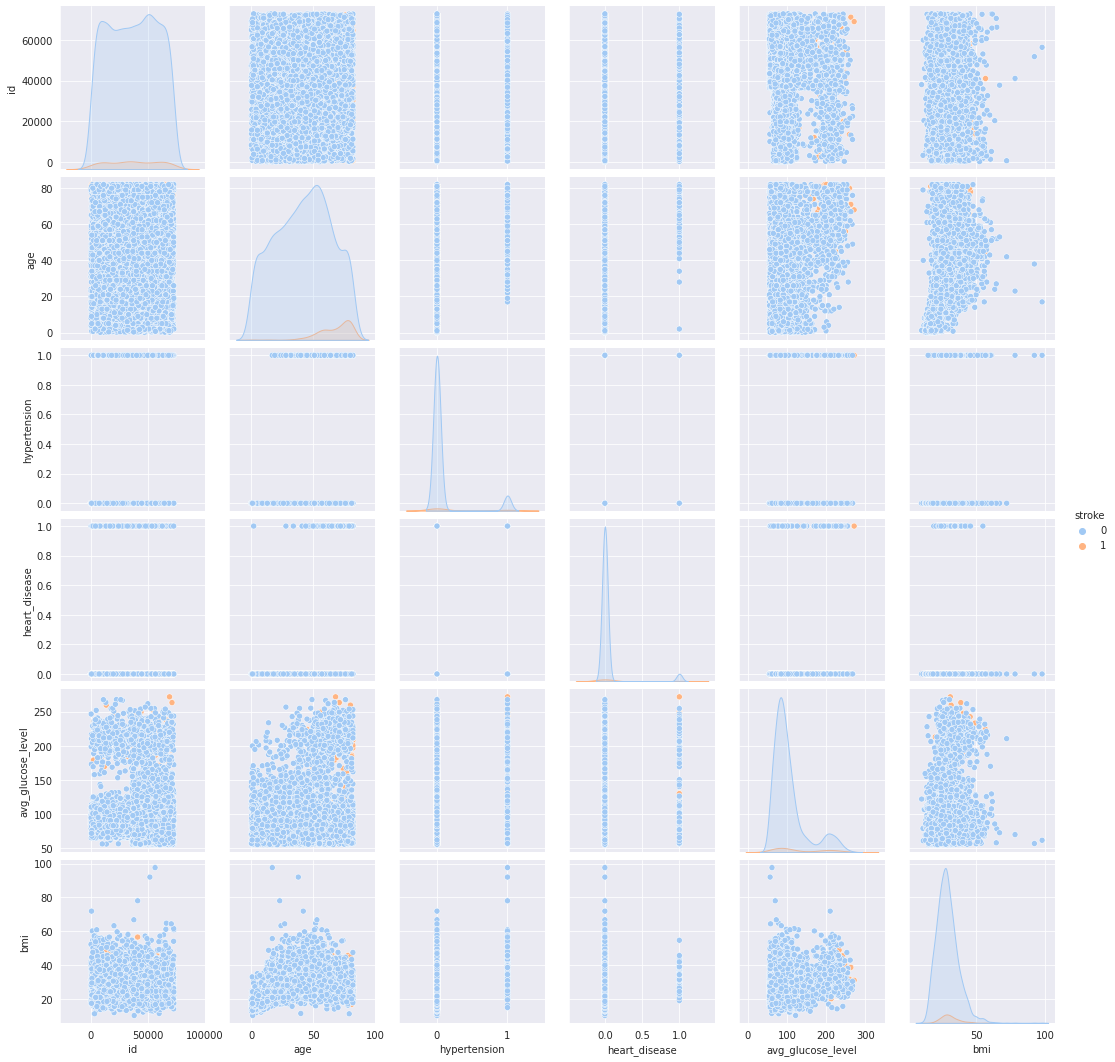

In [ ]:
# Plot pairplot using target stroke column
sns.pairplot(df, hue='stroke', diag_kind="kde", kind="scatter", palette='pastel')
plt.show()

Correlation Matrix

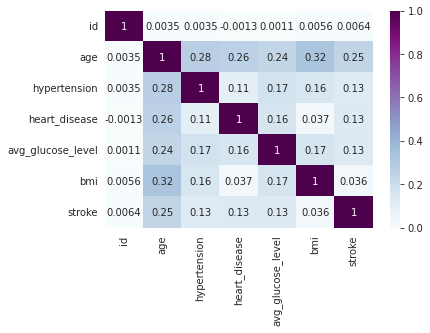

In [ ]:
# Plot corelation matrix
sns.heatmap(df.corr(), annot=True, cmap='BuPu')
plt.show()

# Modeling the Data

### Preparing Data for Training

Data Transformation

In [ ]:
# There is only one entry with gender = 'Other', so we can drop this entry without consequence
df.drop(df[df['gender']=='Other'].index,inplace=True)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Hard code categorical data into 1's and 0's
df.gender.replace({'Male':1,'Female':0},inplace = True)
df.ever_married.replace({'Yes':1,'No':0},inplace = True)
df.Residence_type.replace({'Urban':1,'Rural':0},inplace = True)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,28.1,1,0,0,0,1,0,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,60182,0,49.0,0,0,1,1,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,1665,0,79.0,1,0,1,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0


In [ ]:
# Convert smoking_status, work_type variable into dummy/indicator variables
df = pd.get_dummies(df, columns = ['work_type','smoking_status'])
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,28.1,1,0,0,0,1,0,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,60182,0,49.0,0,0,1,1,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,1665,0,79.0,1,0,1,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0


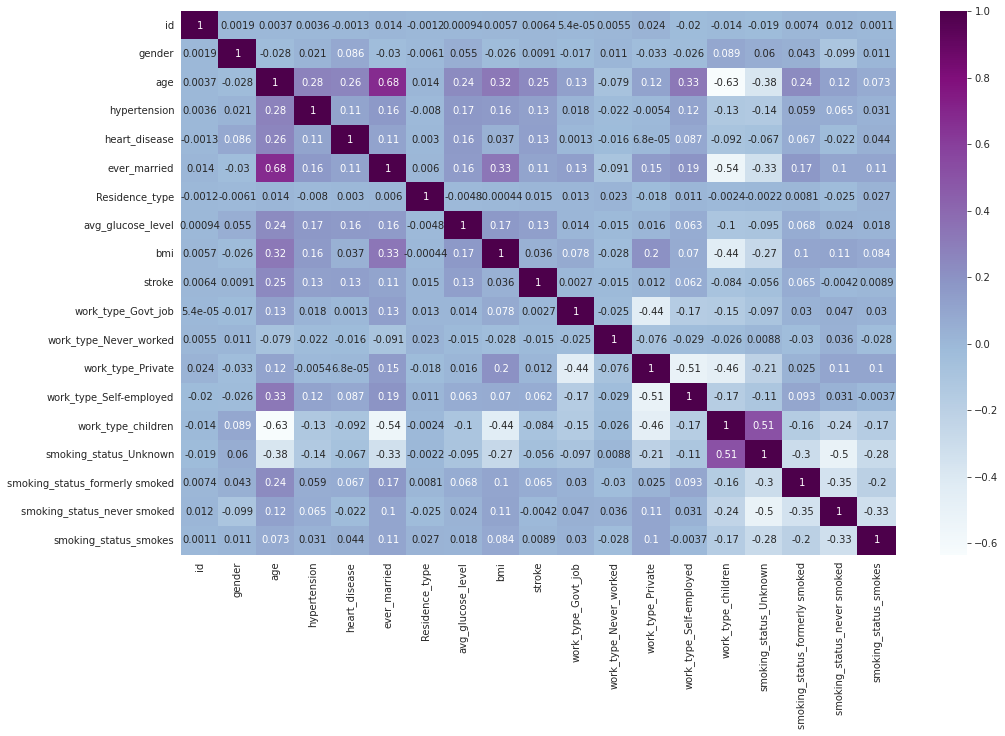

In [ ]:
# There are now 18 features
# Plot coreelation matrix
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True, cmap='BuPu')
plt.show()

In [ ]:
# Populate X w/ 1st through 17th columns
X = df.drop('stroke', axis=1)
# Populate y w/ 18th column
y = df['stroke']

In [ ]:
# Data is unbalanced, so we must use oversampling to balance data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_ov, y_ov = sm.fit_resample(X, y)

In [ ]:
# Check distribution of data
print('Distribution of Stroke:', np.array(y_ov==1).sum())
print('Distribution of No Stroke', np.array(y_ov==0).sum())

Distribution of Stroke: 4860
Distribution of No Stroke 4860


### Training and Testing the Data

In [ ]:
# Split the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

# Populate X_train, X_test, y_train, and y_test (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_ov, y_ov, test_size = 0.2, random_state = 0)

In [ ]:
# Now that data is balanced, scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

KNN Classifier Model

confusion matrix:
[[923  47]
 [ 67 907]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       970
           1       0.95      0.93      0.94       974

    accuracy                           0.94      1944
   macro avg       0.94      0.94      0.94      1944
weighted avg       0.94      0.94      0.94      1944

The accuracy is:  94 %
MSE: 0.0586

R Squared Score:
0.7654311056542263



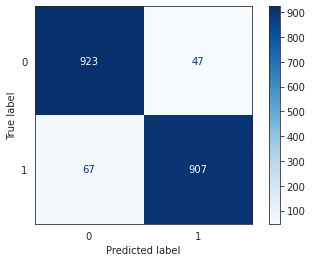

In [ ]:
# Create a classifier from KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 10, metric='minkowski', p=2)
# Fit the classifier to the Training set
kn.fit(X_train, y_train)

# Predict the Test set results
y_pred = kn.predict(X_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
cm_kn = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm_kn)
sns.set_style(style='white')
plot_confusion_matrix(kn, X_test, y_test, cmap='Blues');

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

print("The accuracy is: ", round(kn.score(X_test, y_test)*100),'%')

from sklearn.metrics import mean_squared_error
mse_kn = mean_squared_error(y_test, kn.predict(X_test))
print("MSE: %.4f" % mse_kn)
print()

from sklearn.metrics import r2_score
print("R Squared Score:")
print(r2_score(y_test, y_pred))
print()

Decision Tree Model

confusion matrix:
[[884  86]
 [ 48 926]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       970
           1       0.92      0.95      0.93       974

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

The accuracy is:  93 %
MSE: 0.0689

R Squared Score:
0.7242786680497046



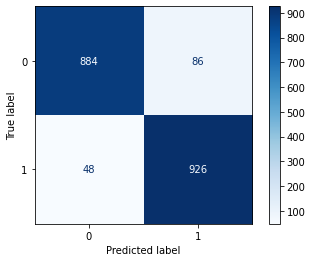

In [ ]:
# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', random_state=123)
dt.fit(X_train, y_train) 

# Predicting the Test set results
y_pred = dt.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm_dt)
plot_confusion_matrix(dt, X_test, y_test, cmap='Blues');

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

print("The accuracy is: ", round(dt.score(X_test, y_test)*100),'%')

from sklearn.metrics import mean_squared_error
mse_dt = mean_squared_error(y_test, dt.predict(X_test))
print("MSE: %.4f" % mse_dt)
print()

from sklearn.metrics import r2_score
print("R Squared Score:")
print(r2_score(y_test, y_pred))
print()

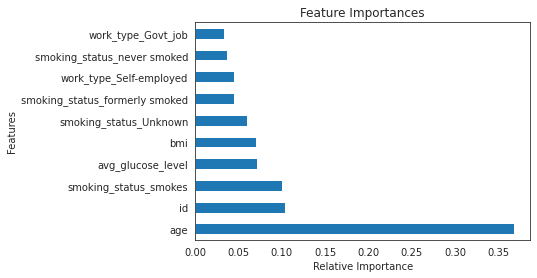

In [ ]:
# Feature importance for decision tree
feat_import_dt = pd.Series(dt.feature_importances_, index=X.columns)
feat_import_dt.nlargest(10).plot(kind='barh')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

Random Forest Model

confusion matrix:
[[939  31]
 [ 48 926]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       970
           1       0.97      0.95      0.96       974

    accuracy                           0.96      1944
   macro avg       0.96      0.96      0.96      1944
weighted avg       0.96      0.96      0.96      1944

The accuracy is:  96 %
MSE: 0.0406

R Squared Score:
0.8374478714621394



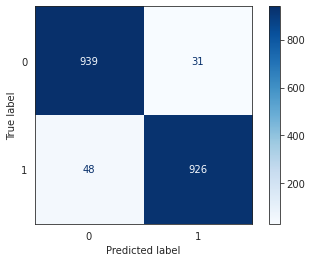

In [ ]:
# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion='entropy', random_state = 0)
rf.fit(X_train, y_train) 

# Predicting the Test set results
y_pred = rf.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm_rf)
plot_confusion_matrix(rf, X_test, y_test, cmap='Blues');

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

print("The accuracy is: ", round(rf.score(X_test, y_test)*100),'%')

from sklearn.metrics import mean_squared_error
mse_rf = mean_squared_error(y_test, rf.predict(X_test))
print("MSE: %.4f" % mse_rf)
print()

from sklearn.metrics import r2_score
print("R Squared Score:")
print(r2_score(y_test, y_pred))
print()

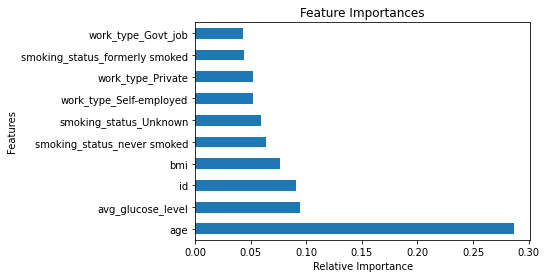

In [ ]:
# Feature importance for random forest 
feat_import_rf = pd.Series(rf.feature_importances_, index=X.columns)
feat_import_rf.nlargest(10).plot(kind='barh')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

SVM Model

confusion matrix:
[[945  25]
 [ 93 881]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       970
           1       0.97      0.90      0.94       974

    accuracy                           0.94      1944
   macro avg       0.94      0.94      0.94      1944
weighted avg       0.94      0.94      0.94      1944

The accuracy is:  94 %
MSE: 0.0607

R Squared Score:
0.7572006181333221



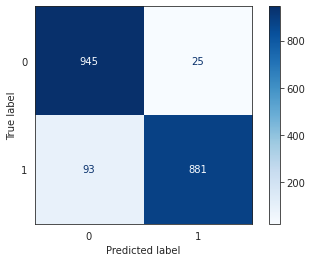

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
svm = SVC(kernel = 'poly', random_state = 0)
svm.fit(X_train, y_train)

# Predicting the Test set results
y_pred = svm.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm_svm)
plot_confusion_matrix(svm, X_test, y_test, cmap='Blues');

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

print("The accuracy is: ", round(svm.score(X_test, y_test)*100),'%')

from sklearn.metrics import mean_squared_error
mse_svm = mean_squared_error(y_test, svm.predict(X_test))
print("MSE: %.4f" % mse_svm)
print()

from sklearn.metrics import r2_score
print("R Squared Score:")
print(r2_score(y_test, y_pred))
print()

Logistic Regression Model

confusion matrix:
[[939  31]
 [105 869]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       970
           1       0.97      0.89      0.93       974

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

The accuracy is:  93 %
MSE: 0.0700

R Squared Score:
0.7201634242892525



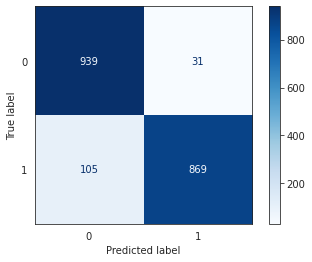

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = lr.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm_lr)
plot_confusion_matrix(lr, X_test, y_test, cmap='Blues');

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

print("The accuracy is: ", round(lr.score(X_test, y_test)*100),'%')

from sklearn.metrics import mean_squared_error
mse_lr = mean_squared_error(y_test, lr.predict(X_test))
print("MSE: %.4f" % mse_lr)
print()

from sklearn.metrics import r2_score
print("R Squared Score:")
print(r2_score(y_test, y_pred))
print()

XGboost Model

confusion matrix:
[[954  16]
 [ 51 923]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       970
           1       0.98      0.95      0.96       974

    accuracy                           0.97      1944
   macro avg       0.97      0.97      0.97      1944
weighted avg       0.97      0.97      0.97      1944

The accuracy is:  97 %
MSE: 0.0345

R Squared Score:
0.8621393340248523



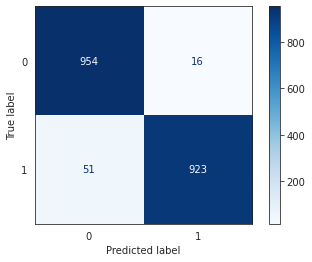

In [ ]:
# Fitting xgboost to the training set
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=500)
xgb.fit(X_train, y_train)

# Predicting the Test set results
y_pred = xgb.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
cm_xgb = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm_xgb)
plot_confusion_matrix(xgb, X_test, y_test, cmap='Blues');

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

print("The accuracy is: ", round(xgb.score(X_test, y_test)*100),'%')

from sklearn.metrics import mean_squared_error
mse_xgb = mean_squared_error(y_test, xgb.predict(X_test))
print("MSE: %.4f" % mse_xgb)
print()

from sklearn.metrics import r2_score
print("R Squared Score:")
print(r2_score(y_test, y_pred))
print()

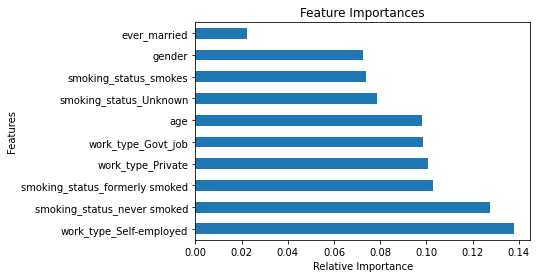

In [ ]:
# Feature importance for xgboost
feat_import_xgb = pd.Series(xgb.feature_importances_, index=X.columns)
feat_import_xgb.nlargest(10).plot(kind='barh')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

MLP Model

confusion_matrix:
[[936  34]
 [ 51 923]]

classification report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       970
           1       0.94      0.95      0.95       974

    accuracy                           0.95      1944
   macro avg       0.95      0.95      0.95      1944
weighted avg       0.95      0.95      0.95      1944


MSE: 0.0437

R Squared Score:
0.8251021401807828



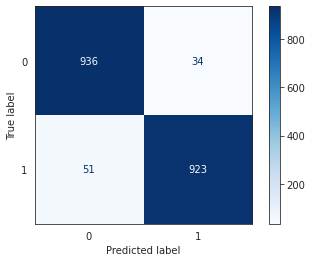

In [ ]:
# Create an instance of the model: we will only define the 
# hidden_layer_sizes. For this parameter pass in a tuple 
# For simplicity we use 3 layers 
# with the same number of neurons as there are features 
# in our data set, along with 500 max iterations.

# train the training data to the model: 
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(18,18,18),max_iter=500)
mlp.fit(X_train,y_train)

# Predictions and Evaluation:
# Get predictions via the predict() method of the fitted model:
y_pred = mlp.predict(X_test)

# Generate a confusion matrix: 
from sklearn.metrics import classification_report,confusion_matrix 
from sklearn.metrics import plot_confusion_matrix

print("confusion_matrix:")
print(confusion_matrix(y_test, y_pred))
print()
plot_confusion_matrix(mlp, X_test, y_test, cmap='Blues');

print("classification report:")
print(classification_report(y_test, y_pred))
print()

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, mlp.predict(X_test))
print("MSE: %.4f" % mse)
print()

from sklearn.metrics import r2_score
print("R Squared Score:")
print(r2_score(y_test, y_pred))
print()

# Principal Composition Analysis

In [ ]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline

In [ ]:
# Populate X w/ 1st through 17th columns
x_pca = df.drop('stroke', axis=1)
# Populate y w/ 18th column
y_pca = df['stroke']
x_std = StandardScaler().fit_transform(x_pca) # normalizing the features
x_std.shape

(5109, 18)

Covariance Matrix

In [ ]:
print('Covariance matrix: \n%s' %np.cov(x_std.T))

Covariance matrix: 
[[ 1.00019577e+00  1.92904131e-03  3.67770743e-03  3.61035727e-03
  -1.25289194e-03  1.39470357e-02 -1.21893169e-03  9.43506840e-04
   5.70914384e-03  5.35771726e-05  5.47227959e-03  2.35495036e-02
  -1.98826247e-02 -1.38718813e-02 -1.91293260e-02  7.42023753e-03
   1.15693474e-02  1.08171061e-03]
 [ 1.92904131e-03  1.00019577e+00 -2.77572297e-02  2.12270922e-02
   8.57013037e-02 -3.01771470e-02 -6.10592037e-03  5.47328013e-02
  -2.64572341e-02 -1.66013176e-02  1.14879697e-02 -3.25082080e-02
  -2.60500460e-02  8.92431461e-02  5.95681625e-02  4.31289698e-02
  -9.89709046e-02  1.14099315e-02]
 [ 3.67770743e-03 -2.77572297e-02  1.00019577e+00  2.76421350e-01
   2.63828381e-01  6.79217352e-01  1.40334317e-02  2.38369498e-01
   3.24274773e-01  1.29990551e-01 -7.86822224e-02  1.16700669e-01
   3.28013171e-01 -6.34443860e-01 -3.78440547e-01  2.37393277e-01
   1.19229873e-01  7.30894601e-02]
 [ 3.61035727e-03  2.12270922e-02  2.76421350e-01  1.00019577e+00
   1.08313658e-01

Eigenvalues and Eigenvectors

In [ ]:
# Perform eigenvalue decomposition on cov. matrix
cov_mat=np.cov(x_std.T)
e_vals, e_vects = np.linalg.eig(cov_mat)
print('Eigenvectors: \n%s' %e_vects)
print('Eigenvalues: \n%s' %e_vals)

Eigenvectors: 
[[ 1.13981783e-02 -3.93663149e-02 -4.49096199e-03  1.12856277e-02
   3.99603505e-03  1.89088996e-02  3.83213022e-03  4.33277850e-02
   9.86666406e-02  1.55822111e-02  1.72475211e-01  9.56446234e-01
   1.95993212e-01  3.24502102e-02  3.95462863e-02  1.90281604e-02
  -5.87409819e-17  1.10925519e-17]
 [-3.80179597e-02  1.08009466e-01  4.27929280e-03  5.37616090e-02
   2.36202870e-01 -4.85915490e-02 -1.27944526e-01 -1.59959581e-01
   3.74161596e-01 -3.59754718e-02  1.98247552e-01 -4.49251300e-03
  -2.22038167e-01 -5.10026219e-01  3.76013514e-01 -5.02436961e-01
   3.97396510e-16  3.18173812e-17]
 [ 4.50202756e-01  1.77605031e-01 -7.91019520e-01  9.35955937e-02
   4.00493924e-02 -2.42327411e-01 -4.98493022e-02  7.07650892e-03
  -3.54746459e-02 -1.32293379e-01 -4.78262428e-02 -2.30003643e-03
   5.18172214e-02 -3.67333399e-02  1.46286171e-01  1.48167886e-01
  -3.49811386e-15  1.10386005e-15]
 [ 1.82108993e-01  1.54343541e-01  1.08690729e-01  3.99190915e-02
   1.14299287e-02 -3.4

In [ ]:
# Visually confirm that the list is corecctly sorted 
# by decreasing evals
e_pairs = [(np.abs(e_vals[i]), e_vects[:, i]) for i in range(len(e_vals))]
print('Eigenvalues in decr. order: ')
for i in e_pairs:
  print(i[0])

Eigenvalues in decr. order: 
3.3794909736838195
1.7410052870364028
0.24036356131767544
0.4203131931825644
1.473410463444261
0.6928083045331508
1.245180277566627
1.1655584037010072
1.1256974254079988
0.8084344711952106
1.0356063095358512
0.9972495207465566
0.9793110018997845
0.9370830243287186
0.8687095191488061
0.8933021473749277
2.3458289887282756e-15
4.3399220492002624e-15


Visualize Component Variance

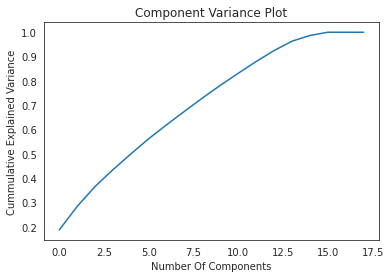

In [ ]:
from sklearn.decomposition import PCA

# Explained variance
# How many number of compononents (features) are explaining 
# what amount of the data
pca = PCA().fit(x_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number Of Components')
plt.ylabel('Cummulative Explained Variance')
plt.title('Component Variance Plot')
plt.show()

In [ ]:
# We can see graph doesn't plateu until around 15 compononets
# But starts to flatten out at around 12.5
# This means 12-15 features is ideal for performing accurate analysis

In [ ]:
pca5 = PCA(n_components=5)
x_pca_5 = pca5.fit_transform(x_std)
print(pca5.explained_variance_ratio_)

[0.18771275 0.09670358 0.08184009 0.06916314 0.06474055]


In [ ]:
print(sum(pca5.explained_variance_ratio_))

0.5001601076086536


In [ ]:
pca12 = PCA(n_components=12)
x_pca_12 = pca12.fit_transform(x_std)
print(pca12.explained_variance_ratio_)

[0.18771275 0.09670358 0.08184011 0.06916314 0.06474057 0.0625265
 0.05752242 0.05539191 0.05439552 0.05204998 0.04961818 0.04825219]


In [ ]:
print(sum(pca12.explained_variance_ratio_))

0.8799168682672436


In [ ]:
# Only 50% of the data is explained by the first 5 features
# Close to 90% of the data is explained by the first 12 features

In [ ]:
pca5.components_

array([[-0.01139817,  0.03801795, -0.45020135, -0.18210916, -0.13032862,
        -0.4079813 , -0.00306398, -0.16143459, -0.30920701, -0.0700663 ,
         0.04270654, -0.16749957, -0.13984134,  0.45385155,  0.37184342,
        -0.15495283, -0.15908189, -0.09774919],
       [-0.03936602,  0.10800935,  0.17763095,  0.15434062,  0.18511005,
         0.08054109,  0.03474318,  0.14207685, -0.07850324,  0.25538486,
        -0.01796875, -0.63939481,  0.48577643,  0.15768487,  0.14321048,
         0.20568388, -0.24553316, -0.06919045],
       [-0.00399332, -0.23620417, -0.03985139, -0.01145134, -0.17605545,
        -0.04375683, -0.02891753, -0.11212801, -0.03633645,  0.25494495,
         0.13369969, -0.29325816,  0.15198836, -0.01399363, -0.17950329,
        -0.33352942,  0.67414514, -0.32361829],
       [ 0.00383416, -0.12794568, -0.04974279, -0.20021256, -0.2177981 ,
         0.0732109 ,  0.12386197, -0.23866921,  0.05855039,  0.6032052 ,
        -0.02173334, -0.17484568, -0.21426951, -0.103

In [ ]:
pca12.components_

array([[-0.01139818,  0.03801796, -0.45020276, -0.18210899, -0.13032837,
        -0.40798073, -0.00306397, -0.16143445, -0.30920713, -0.07006613,
         0.04270645, -0.16749947, -0.13984097,  0.45385086,  0.37184352,
        -0.15495278, -0.15908195, -0.0977493 ],
       [-0.03936631,  0.10800947,  0.17760503,  0.15434354,  0.18511478,
         0.08055144,  0.03474329,  0.14207938, -0.07850509,  0.25538829,
        -0.01797052, -0.63939306,  0.48578325,  0.15767198,  0.14321243,
         0.2056848 , -0.24553406, -0.06919268],
       [-0.00399604, -0.23620287, -0.04004939, -0.01142993, -0.17601852,
        -0.04367851, -0.02891732, -0.1121084 , -0.03634879,  0.25497146,
         0.13368474, -0.2932441 ,  0.15203963, -0.01409228, -0.17948767,
        -0.33352167,  0.67413686, -0.3236352 ],
       [ 0.00383213, -0.12794453, -0.0498493 , -0.20020181, -0.21777755,
         0.07325256,  0.1238609 , -0.23865806,  0.05854539,  0.60322047,
        -0.02174326, -0.17483775, -0.21424307, -0.103

Visualize Results

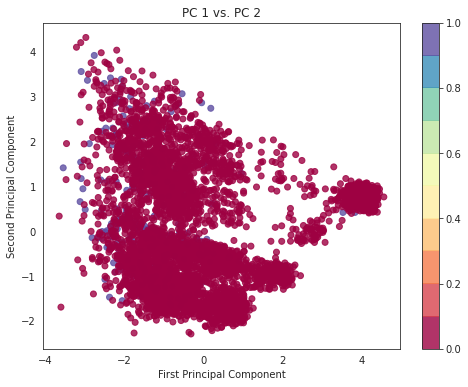

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca_5[:,0], x_pca_5[:,1], c=df['stroke'],
            alpha=0.8,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PC 1 vs. PC 2')
plt.colorbar();

In [ ]:
# Create new dataframe for PCA dataeset with 3 components
pca = PCA(n_components=3)
x_pca = pca.fit_transform(x_std)

pca_m = pd.DataFrame(data = x_pca, columns = ['p1', 'p2', 'p3'])
pca_m.head()

,p1,p2,p3
0,-2.602410,1.133882,-2.871800
1,-1.527495,1.470028,1.846744
2,-2.184378,-0.264750,-0.238400
3,-1.340193,-1.032276,-1.444709
4,-2.208381,2.183035,1.881693


Regression Model on PCA Dataset

In [ ]:
# Populate X w/ pca_m table
X_pca = pca_m
# Populate y target column of og dataset
y_pca = df['stroke']

In [ ]:
# Data is unbalanced, so we must use oversampling to balance data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_ov_pca, y_ov_pca = sm.fit_resample(X_pca, y_pca)

In [ ]:
# Split the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

# Populate X_train, X_test, y_train, and y_test (80/20 split)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_ov_pca, 
                                                                    y_ov_pca, 
                                                                    test_size = 0.2, 
                                                                    random_state = 123)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_pca = LogisticRegression(random_state=0)
lr_pca.fit(X_train_pca, y_train_pca)

# Predicting the Test set results
y_pred_pca = lr_pca.predict(X_test_pca)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_lr_pca = confusion_matrix(y_test_pca, y_pred_pca)
print("confusion matrix:")
print(cm_lr_pca)

from sklearn import metrics
print(metrics.classification_report(y_test_pca, y_pred_pca))

print("The accuracy is: ", round(lr_pca.score(X_test_pca, y_test_pca)*100),'%')
print()

from sklearn.metrics import r2_score
print("R Squared Score:")
print(r2_score(y_test_pca, y_pred_pca))
print()

confusion matrix:
[[628 334]
 [236 746]]
              precision    recall  f1-score   support

           0       0.73      0.65      0.69       962
           1       0.69      0.76      0.72       982

    accuracy                           0.71      1944
   macro avg       0.71      0.71      0.71      1944
weighted avg       0.71      0.71      0.71      1944

The accuracy is:  71 %

R Squared Score:
-0.17296365768870858



In [ ]:
# accuracy went down to 71%: 20% reduction in accuracy
# decrease in accuracy makes sense becuse 3 features 
# only had an explained variance of around 40%

Random Forest on PCA Dataset

In [ ]:
# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
rf_pca = RandomForestClassifier(n_estimators = 10, 
                                criterion='entropy', random_state = 0)
rf_pca.fit(X_train_pca, y_train_pca) 

# Predicting the Test set results
y_pred_pca = rf_pca.predict(X_test_pca)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_rf_pca = confusion_matrix(y_test_pca, y_pred_pca)
print("confusion matrix:")
print(cm_rf_pca)

from sklearn import metrics
print(metrics.classification_report(y_test_pca, y_pred_pca))

print("The accuracy is: ", round(rf_pca.score(X_test_pca, y_test_pca)*100),'%')
mse_rf_pca = mean_squared_error(y_test_pca, rf_pca.predict(X_test_pca))
print("MSE: %.4f" % mse_rf_pca)
print()

from sklearn.metrics import r2_score
print("R Squared Score:")
print(r2_score(y_test_pca, y_pred_pca))
print()

confusion matrix:
[[812 150]
 [ 96 886]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       962
           1       0.86      0.90      0.88       982

    accuracy                           0.87      1944
   macro avg       0.87      0.87      0.87      1944
weighted avg       0.87      0.87      0.87      1944

The accuracy is:  87 %
MSE: 0.1265

R Squared Score:
0.49377357931329424



In [ ]:
# Accuracy also went down on random forest model: ~10% reduction in accuracy

XGBoost on PCA Dataset

In [ ]:
# Fitting xgboost to the training set
from xgboost import XGBClassifier
xgb_pca = XGBClassifier(n_estimators=500)
xgb_pca.fit(X_train_pca, y_train_pca)

# Predicting the Test set results
y_pred_xgb_pca = xgb_pca.predict(X_test_pca)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
cm_xgb_pca = confusion_matrix(y_test_pca, y_pred_xgb_pca)
print("confusion matrix:")
print(cm_xgb_pca)
#plot_confusion_matrix(xgb_pca, X_test_pca, y_test_pca, cmap='Blues');

from sklearn import metrics
print(metrics.classification_report(y_test_pca, y_pred_xgb_pca))

print("The accuracy is: ", round(xgb_pca.score(X_test_pca, y_test_pca)*100),'%')

from sklearn.metrics import mean_squared_error
mse_xgb_pca = mean_squared_error(y_test_pca, xgb_pca.predict(X_test_pca))
print("MSE: %.4f" % mse_xgb_pca)
print()

from sklearn.metrics import r2_score
print("R Squared Score:")
print(r2_score(y_test_pca, y_pred_pca))
print()

confusion matrix:
[[717 245]
 [ 99 883]]
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       962
           1       0.78      0.90      0.84       982

    accuracy                           0.82      1944
   macro avg       0.83      0.82      0.82      1944
weighted avg       0.83      0.82      0.82      1944

The accuracy is:  82 %
MSE: 0.1770

R Squared Score:
0.49377357931329424



# **Conclusions:**

Age seems to be greatest indicator of stroke


XGboost had the highest accuracy and lowest MSE of all classification models, with an accuracy of 97% and a MSE of 0.03

Random Forest performed second best, with an accuracy of 96% and a MSE of 0.04

Logistic Regression performed the worst, with an accuracy of 93% and an MSE of 0.07

After PCA, Random Forest performed better than XGBoost:

> Random Forest: accuracy of 87%, MSE of 0.13

> XGBoost: accuracy of 83%, MSE of 0.17

**Next Steps:** feature engineering, fine tuning models. 
